# import packages and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load data
data = pd.read_excel('load df_mouse.xlsx here')
# set seaborn theme
sns.set_theme()
# fix labels of brain areas
data['b_area'] = data['b_area'].apply(str)
data['b_area'] = data['b_area'].replace({'1':'OB', '2':'PFC'})
# make a qualitative palette for the plots
colors = ['#ff9900', '#494d87']
order = ['OB', 'PFC']

<Axes: xlabel='age', ylabel='count'>

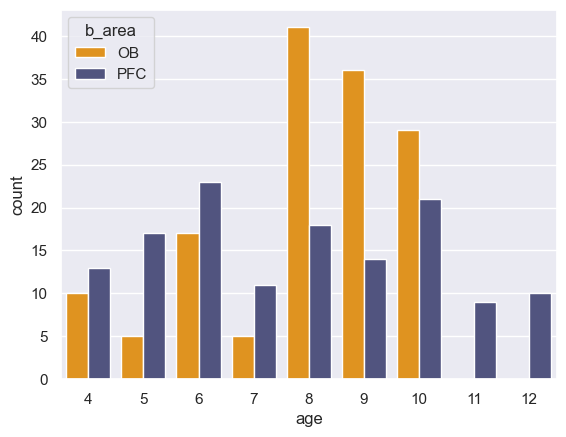

In [2]:
# group dataframe over age and brain area
grouped_df = data.groupby(['age', 'b_area']).size().reset_index(name='count')
# plot the number of mice over age and brain area
plt.figure()
sns.barplot(x='age', hue='b_area', y='count', data=grouped_df, palette=colors, hue_order=order)

<Axes: xlabel='age', ylabel='n_units'>

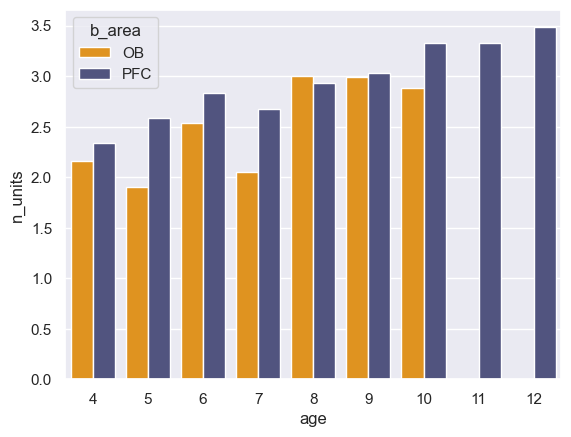

In [3]:
# group dataframe over age and brain area
grouped_df = data.groupby(['age', 'b_area']).sum().reset_index()
grouped_df.n_units = np.log10(grouped_df.n_units)
# plot the number of mice over age and brain area
plt.figure()
sns.barplot(x='age', hue='b_area', y='n_units', data=grouped_df, palette=colors, hue_order=order)

(1, 1000)

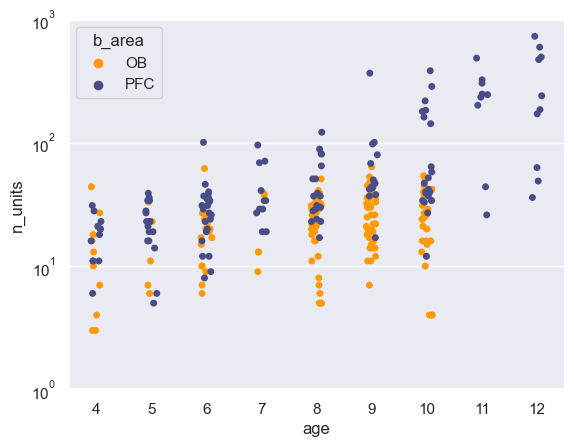

In [4]:
# plot number of units of individual mice over age and brain area
plt.figure()
sns.stripplot(x='age', hue='b_area', y='n_units', data=data, palette=colors, hue_order=order)
plt.yscale('log')
plt.ylim(1, 1000)